In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/survey.csv')

**Data Cleaning**

In [4]:
data.drop(columns=["comments", "state", "Timestamp"], inplace=True)

Filter reasonable ages (18–65)

In [5]:
data=data[(data['Age']>=18) & (data['Age']<=65)]

Normalize gender values

In [6]:
def clean_gender(g):
    g = g.strip().lower()
    if 'female' in g:
        return 'Female'
    elif 'male' in g:
        return 'Male'
    elif 'trans' in g:
        return 'Trans'
    else:
        return 'Other'

In [8]:
data['Gender'] = data['Gender'].apply(clean_gender)

Handle missing values

In [10]:
data['self_employed'].fillna('No', inplace=True)
data['work_interfere'].fillna('Don’t know', inplace=True)

<ipython-input-10-c7be09c613c7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['self_employed'].fillna('No', inplace=True)
<ipython-input-10-c7be09c613c7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Exploratory Data Analysis (EDA)**

Gender Distribution


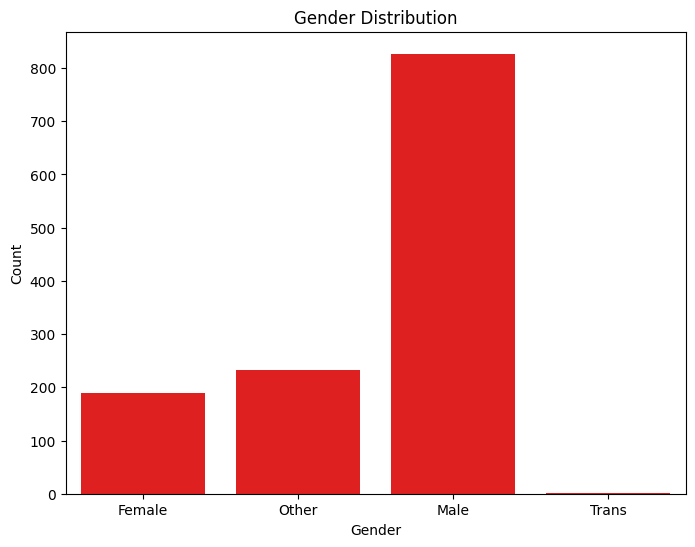

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, color='red')
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Age Distribution

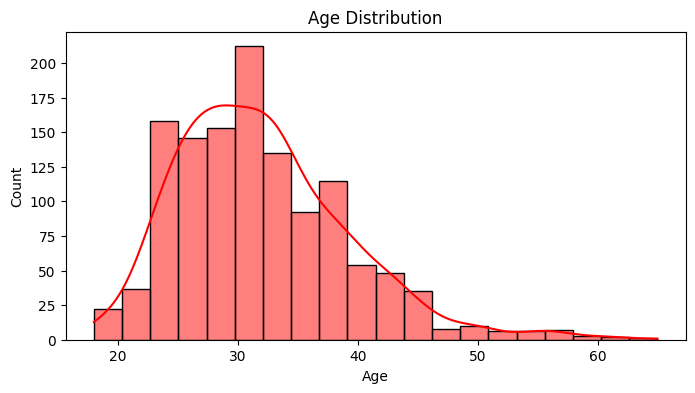

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(data['Age'], bins=20, kde=True, color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Treatment vs Gender

Text(0, 0.5, 'Count')

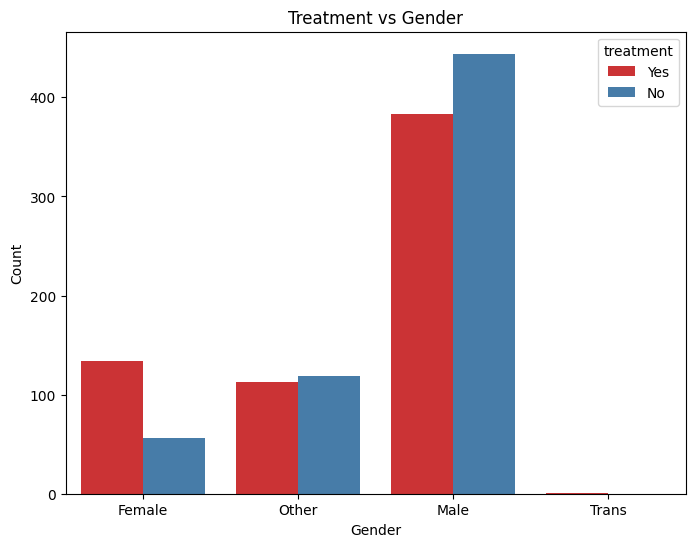

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='treatment', data=data, palette='Set1')
plt.title("Treatment vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

Treatment vs Family History

Text(0, 0.5, 'Count')

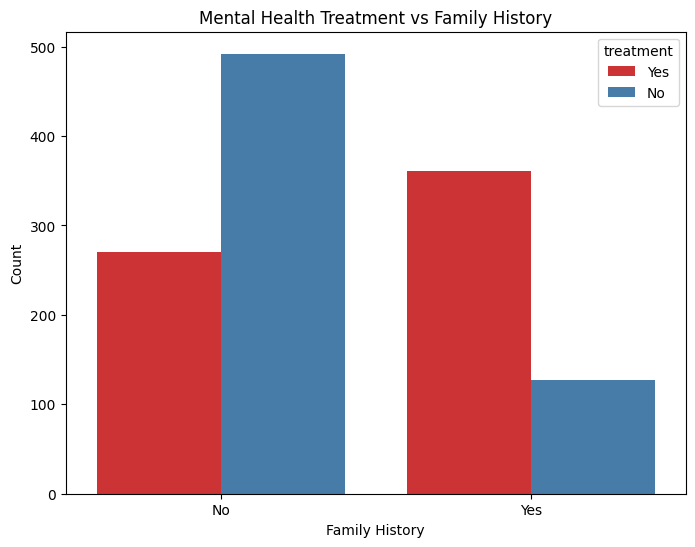

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x='family_history',hue='treatment', data=data, palette='Set1')
plt.title("Mental Health Treatment vs Family History")
plt.xlabel("Family History")
plt.ylabel("Count")

Treatment vs Remote Work

Text(0, 0.5, 'Count')

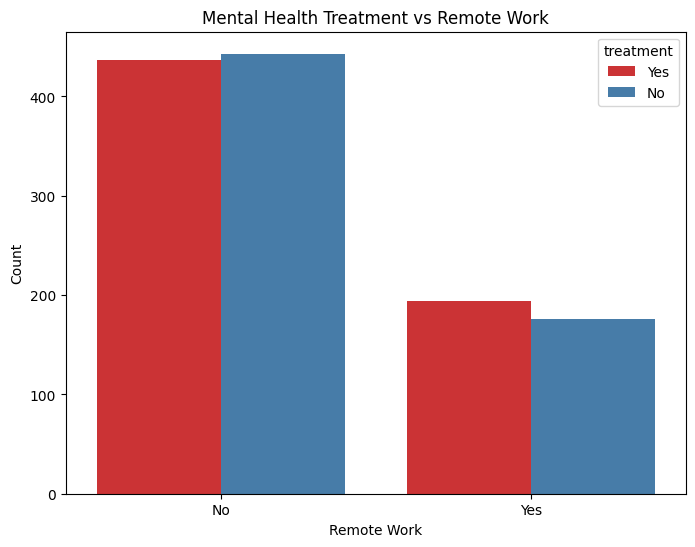

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(x='remote_work',hue='treatment', data=data, palette='Set1')
plt.title("Mental Health Treatment vs Remote Work")
plt.xlabel("Remote Work")
plt.ylabel("Count")

Treatment vs Tech Company

Text(0, 0.5, 'Count')

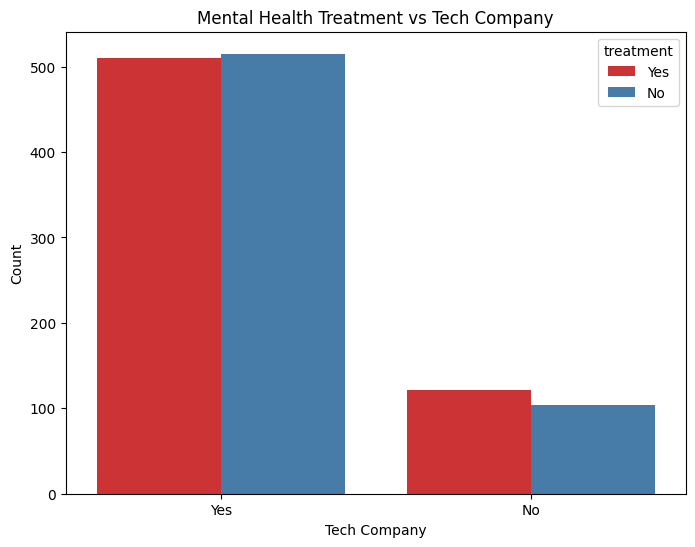

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x='tech_company',hue='treatment', data=data, palette='Set1')
plt.title("Mental Health Treatment vs Tech Company")
plt.xlabel("Tech Company")
plt.ylabel("Count")

Treatment vs Company Size

Text(0, 0.5, 'Count')

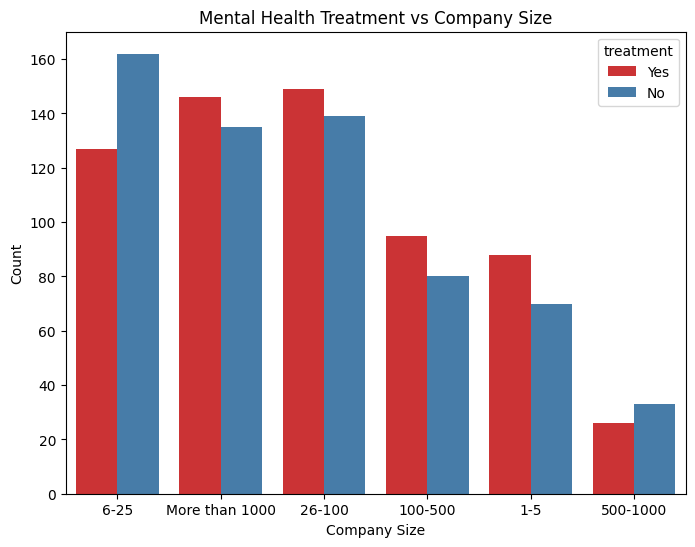

In [34]:
plt.figure(figsize=(8,6))
sns.countplot(x='no_employees',hue='treatment', data=data, palette='Set1')
plt.title("Mental Health Treatment vs Company Size")
plt.xlabel("Company Size")
plt.ylabel("Count")

Treatment vs Mental Health Benefits

Text(0, 0.5, 'Count')

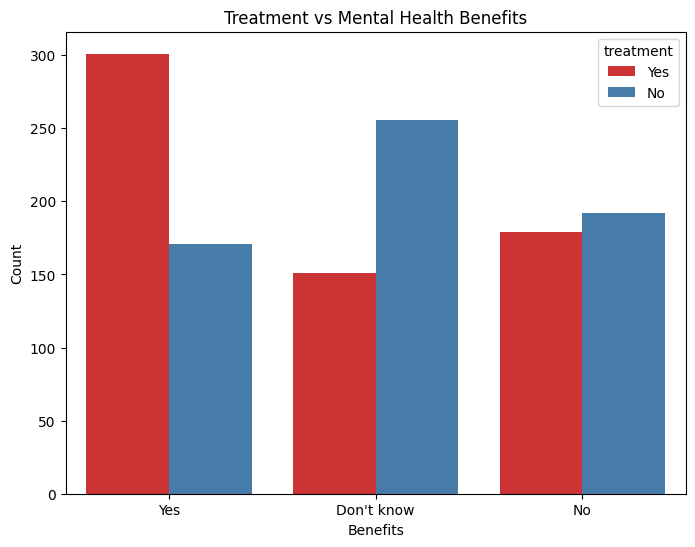

In [36]:
plt.figure(figsize=(8,6))
sns.countplot(x='benefits', hue='treatment', data=data, palette='Set1')
plt.title("Treatment vs Mental Health Benefits")
plt.xlabel("Benefits")
plt.ylabel("Count")

**Correlation Heatmap**

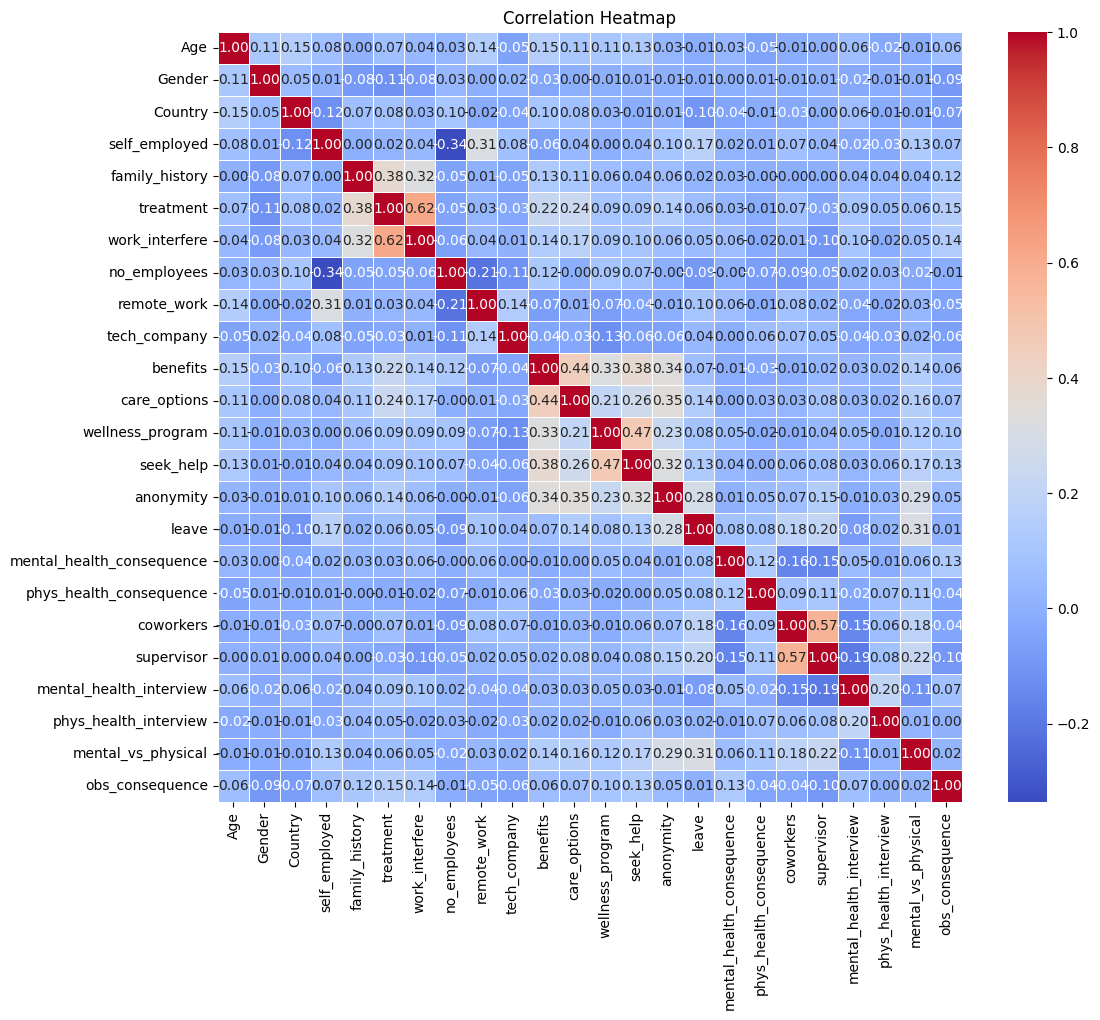

In [38]:
df_encoded = data.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
